In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pathlib

In [2]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,VERDICT,PARAMETER_1,PARAMETER_2,PARAMETER_3,PARAMETER_4,PARAMETER_5,PARAMETER_6,PARAMETER_7,PARAMETER_8,PARAMETER_9
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [3]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,Id,PARAMETER_1,PARAMETER_2,PARAMETER_3,PARAMETER_4,PARAMETER_5,PARAMETER_6,PARAMETER_7,PARAMETER_8,PARAMETER_9
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [4]:
print("Numerical Variables")
numerical_variables = train_data._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
VERDICT
PARAMETER_1
PARAMETER_2
PARAMETER_3
PARAMETER_4
PARAMETER_5
PARAMETER_6
PARAMETER_7
PARAMETER_8
PARAMETER_9


In [5]:
"""plt.figure(figsize=(10,21))
i = 0
for ncol in numerical_variables:
    i += 1
    plt.subplot(2, 2, i)
    train_data[ncol].value_counts().plot(kind='bar', title=ncol)
plt.tight_layout()"""

"plt.figure(figsize=(10,21))\ni = 0\nfor ncol in numerical_variables:\n    i += 1\n    plt.subplot(2, 2, i)\n    train_data[ncol].value_counts().plot(kind='bar', title=ncol)\nplt.tight_layout()"

In [6]:
X = train_data.drop("VERDICT", axis=1).values
y = train_data["VERDICT"].values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((26215, 9), (26215,), (6554, 9), (6554,))

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

In [9]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

In [10]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [11]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

In [12]:
df = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score, 
                                               gb_pred_score, svc_pred_score]))
df

,model,accuracy
0,Logistic Regression,0.943699
1,Random Forest,0.948123
2,Gradient Boosting,0.944767
3,SVM,0.943699


(0.5, 1.0)

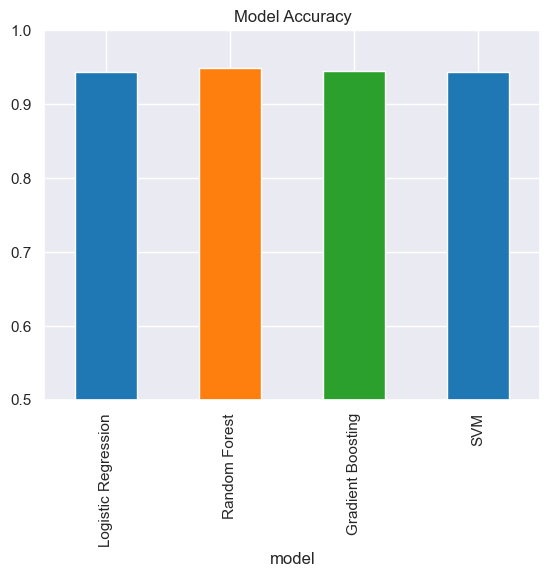

In [13]:
df.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1)

In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58921 entries, 0 to 58920
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id           58921 non-null  int64
 1   PARAMETER_1  58921 non-null  int64
 2   PARAMETER_2  58921 non-null  int64
 3   PARAMETER_3  58921 non-null  int64
 4   PARAMETER_4  58921 non-null  int64
 5   PARAMETER_5  58921 non-null  int64
 6   PARAMETER_6  58921 non-null  int64
 7   PARAMETER_7  58921 non-null  int64
 8   PARAMETER_8  58921 non-null  int64
 9   PARAMETER_9  58921 non-null  int64
dtypes: int64(10)
memory usage: 4.5 MB


In [15]:
X_train = train_data.drop("VERDICT", axis=1)
y_train = train_data['VERDICT']
X_test = test_data.drop("Id", axis=1).copy()

In [16]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [17]:
output = pd.DataFrame({'Id':test_data['Id'],'VERDIT':predictions})
output.to_csv('data/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [18]:
sub = pd.read_csv("data/submission.csv")
sub.head(20)

,Id,VERDIT
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1
